In [53]:
import matplotlib.pyplot as plt
import matplotlib.dates
import numpy as np
import pandas as pd
import tensorflow as tf
from geopy.geocoders import Nominatim
import datetime
import nycsales as nyc
from scipy import stats
from sklearn.model_selection import train_test_split


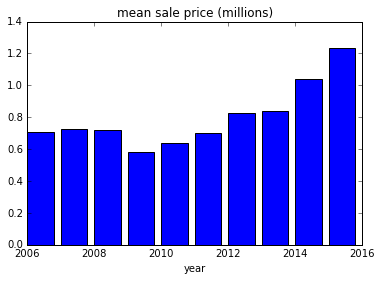

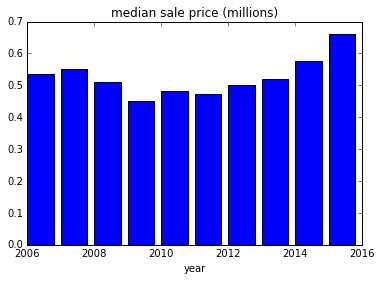

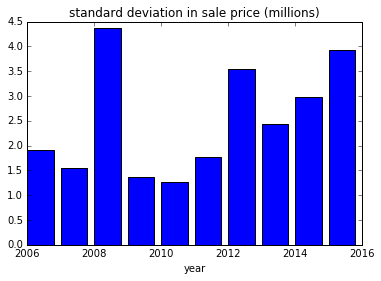

In [2]:
#calculate mean and variance for each year, by neighborhood
years = ['06','07','08','09','10','11','12','13','14','15']
yearlabel = ['20'+i for i in years]
nyears = len(years)
sales_mean = np.zeros((nyears,))
sales_median = np.zeros((nyears,))
sales_std = np.zeros((nyears,))
for i in range(nyears):
    #print(i)
    fname = 'data/20'+years[i]+'_brooklyn.csv'
    bk = pd.read_csv(fname,sep = ',')
    sales_bk = bk.loc[bk['SALE PRICE']> 0,'SALE PRICE']
    sales_mean[i] = np.mean(sales_bk)
    sales_median[i] = np.median(sales_bk)
    sales_std[i]  = np.std(sales_bk)
    


plt.bar(map(int,yearlabel),sales_mean/1.0e6)
plt.xlabel('year')
plt.title('mean sale price (millions)')
plt.show()

plt.bar(map(int,yearlabel),sales_median/1.0e6)
plt.xlabel('year')
plt.title('median sale price (millions)')
plt.show()

plt.bar(map(int,yearlabel),sales_std/1.0e6)
plt.xlabel('year')
plt.title('standard deviation in sale price (millions)')
plt.show()



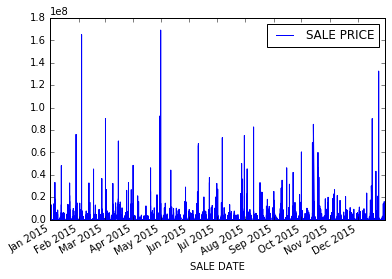

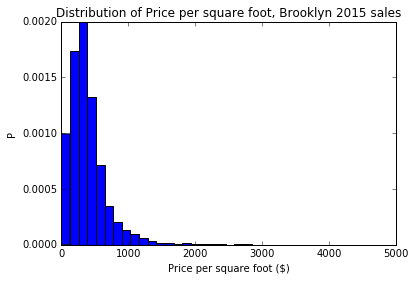

In [3]:
#timecourse of sales in 2015
fname = 'data/2015'+'_brooklyn.csv'
bk = pd.read_csv(fname,sep = ',')

#sort by date and plot
bk['SALE DATE'] =pd.to_datetime(bk['SALE DATE'])
bk.sort_values('SALE DATE')
bk.plot('SALE DATE','SALE PRICE')
plt.show()

#histogram of plot price per sq. ft
test1 = bk['SALE PRICE'] > 0.0 
test2 = bk['GROSS SQUARE FEET'] > 0.0
test3 = ~np.isnan(bk['SALE PRICE'])
test4 = ~np.isnan(bk['GROSS SQUARE FEET'])
test = test1 & test2 & test3 & test4


vals_clean = bk.loc[test,['SALE PRICE','GROSS SQUARE FEET']]
ppsf = vals_clean['SALE PRICE']/vals_clean['GROSS SQUARE FEET']
plt.hist(ppsf,bins=300,normed = True)
plt.xlabel('Price per square foot ($)')
plt.ylabel('P')
plt.xlim([0,5000])
plt.title('Distribution of Price per square foot, Brooklyn 2015 sales')
plt.show()

